<a href="https://colab.research.google.com/github/iris-obed/AI-Data-Engineer-Assignments/blob/master/Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**: Data visualization

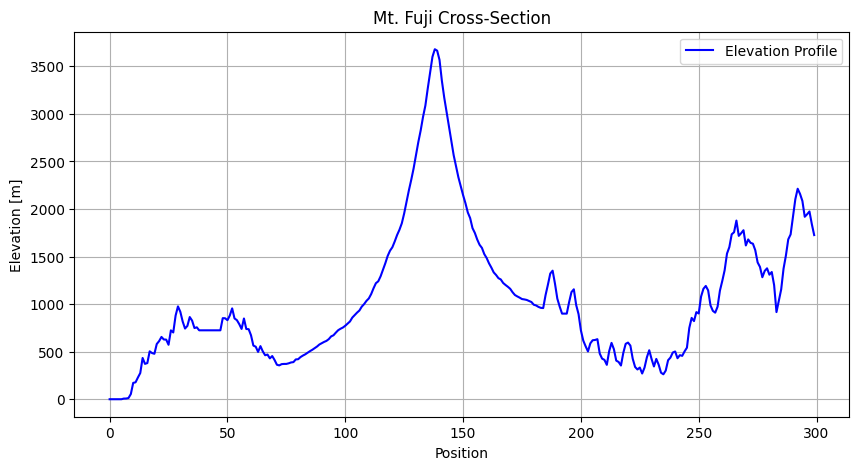

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load the elevation data
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant columns
point_number = fuji[:, 0]
elevation = fuji[:, 3]

# Plot the elevation data
plt.figure(figsize=(10, 5))
plt.plot(point_number, elevation, label="Elevation Profile", color="b")
plt.xlabel("Position")
plt.ylabel("Elevation [m]")
plt.title("Mt. Fuji Cross-Section")
plt.legend()
plt.grid()
plt.show()

# **Problem 2**: Create a function to calculate the gradient at a certain point

In [23]:
import numpy as np

# Load the elevation data
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant columns
point_number = fuji[:, 0]
elevation = fuji[:, 3]

# Function to calculate gradient at a specific point
def calculate_gradient(i):
    if i == 0:
        raise ValueError("Gradient cannot be calculated for the first point (i = 0)")

    gradient = (elevation[i] - elevation[i - 1]) / (point_number[i] - point_number[i - 1])
    return gradient

# Example
index = 130
gradient_value = calculate_gradient(index)
print(f"Gradient at point {index}: {gradient_value}")

Gradient at point 130: 137.30000000000018


# **Problem 3**: Create a function to calculate the destination point

In [24]:
import numpy as np

# Load the elevation data
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant columns
point_number = fuji[:, 0]
elevation = fuji[:, 3]

# Function to calculate gradient at a specific point
def calculate_gradient(i):
    if i == 0:
        raise ValueError("Gradient cannot be calculated for the first point (i = 0)")

    gradient = (elevation[i] - elevation[i - 1]) / (point_number[i] - point_number[i - 1])
    return gradient

# Function to calculate the next destination point
def calculate_destination(current_point, alpha=0.2):
    if current_point <= 0 or current_point >= len(point_number):
        raise ValueError("Invalid point index")

    gradient = calculate_gradient(current_point)
    destination = round(current_point - alpha * gradient)

    # Ensure the destination is within valid range
    destination = max(0, min(destination, len(point_number) - 1))

    return destination

# Example
current_index = 130
destination_index = calculate_destination(current_index)
print(f"Destination point from {current_index}: {destination_index}")

Destination point from 130: 103


# **Problem 4**: Create a function to go down a mountain

In [26]:
def descend_mountain(start_point=136, alpha=0.2):
    path = [start_point]  # Store the path taken
    current_point = start_point

    while True:
        next_point = calculate_destination(current_point, alpha)

        # Stop if the destination does not change (we reached the bottom)
        if next_point == current_point:
            break

        path.append(next_point)
        current_point = next_point

    return path

# Execute descent from point 136
descent_path = descend_mountain()
print(f"Path taken to descend: {descent_path}")

Path taken to descend: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


# **Problem 5**: Visualization of the descent process

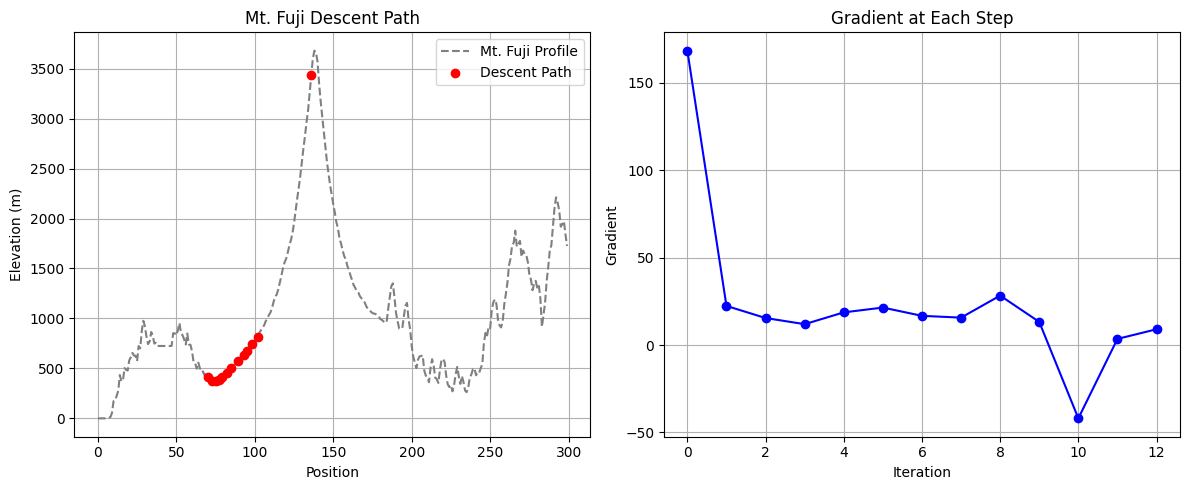

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
fuji_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)

# Extract altitude data
altitudes = fuji_data[:, 3]

# Function from Problem 2
def calculate_gradient(point):
    if point == 0:
        return 0
    return (altitudes[point] - altitudes[point - 1]) / (point - (point - 1))

# Function from Problem 3
def calculate_destination(current_point, alpha=0.2):
    gradient = calculate_gradient(current_point)
    next_point = round(current_point - alpha * gradient)

    # Ensure next_point is within valid range
    next_point = max(0, min(len(altitudes) - 1, next_point))
    return next_point, gradient

# Function from Problem 4
def descend_mountain(start_point=136, alpha=0.2):
    path = [start_point]
    gradients = []
    current_point = start_point

    while True:
        next_point, gradient = calculate_destination(current_point, alpha)

        if next_point == current_point:
            break

        path.append(next_point)
        gradients.append(gradient)
        current_point = next_point

    return path, gradients

# Get descent path and gradients
descent_path, gradients = descend_mountain()

# Plot elevation and descent path
plt.figure(figsize=(12, 5))

# Plot 1: Elevation Profile with Descent Path
plt.subplot(1, 2, 1)
plt.plot(range(len(altitudes)), altitudes, linestyle="dashed", color="gray", label="Mt. Fuji Profile")
plt.scatter(descent_path, altitudes[descent_path], color="red", label="Descent Path", zorder=3)
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.title("Mt. Fuji Descent Path")
plt.legend()
plt.grid()

# Plot 2: Gradient Change During Descent
plt.subplot(1, 2, 2)
plt.plot(range(len(gradients)), gradients, marker="o", linestyle="-", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Gradient")
plt.title("Gradient at Each Step")
plt.grid()

plt.tight_layout()
plt.show()

#**Problem 6**: Changing the initial value

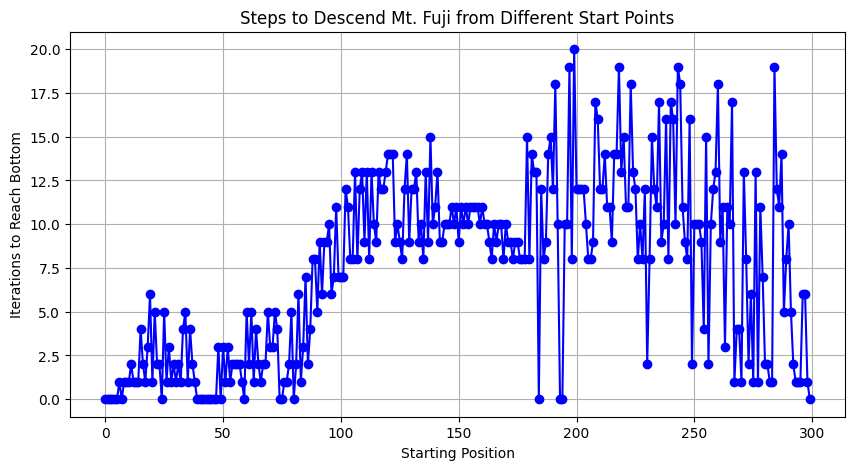

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
fuji_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)
altitudes = fuji_data[:, 3]

# Precompute all gradients in advance
gradients = np.zeros(len(altitudes))
gradients[1:] = (altitudes[1:] - altitudes[:-1])

# Function to calculate next position
def calculate_destination(current_point, alpha=0.2):
    gradient = gradients[current_point]
    next_point = round(current_point - alpha * gradient)
    next_point = max(0, min(len(altitudes) - 1, next_point))
    return next_point

# Function for descending the mountain
def descend_mountain(start_point, alpha=0.2):
    visited = set()
    current_point = start_point
    steps = 0

    while current_point not in visited:
        visited.add(current_point)
        next_point = calculate_destination(current_point, alpha)
        if next_point == current_point:
            break
        current_point = next_point
        steps += 1

    return steps

# Run descent for all starting points
num_positions = len(altitudes)
iterations_needed = np.array([descend_mountain(start) for start in range(num_positions)])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(num_positions), iterations_needed, marker="o", linestyle="-", color="blue")
plt.xlabel("Starting Position")
plt.ylabel("Iterations to Reach Bottom")
plt.title("Steps to Descend Mt. Fuji from Different Start Points")
plt.grid()
plt.show()

#**Problem 7**: Visualization of the descent process for each initial value

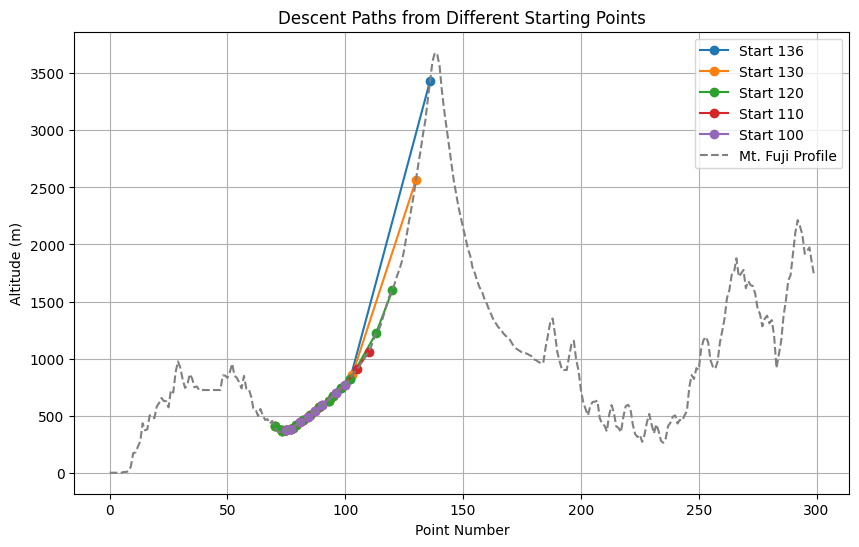

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
fuji_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)
altitudes = fuji_data[:, 3]

# Function from Problem 2
def calculate_gradient(point):
    if point == 0:
        return 0
    return (altitudes[point] - altitudes[point - 1]) / (point - (point - 1))

# Function from Problem 3
def calculate_destination(current_point, alpha=0.2):
    gradient = calculate_gradient(current_point)
    next_point = round(current_point - alpha * gradient)
    next_point = max(0, min(len(altitudes) - 1, next_point))
    return next_point

# Function from Problem 4 (Modified for visualization)
def descend_mountain(start_point, alpha=0.2):
    path = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_destination(current_point, alpha)
        if next_point == current_point:
            break
        path.append(next_point)
        current_point = next_point

    return path

# Select some starting points to visualize
starting_points = [136, 130, 120, 110, 100]

plt.figure(figsize=(10, 6))

# Plot all descents
for start in starting_points:
    path = descend_mountain(start)
    plt.plot(path, [altitudes[p] for p in path], marker="o", linestyle="-", label=f"Start {start}")

# Plot the overall terrain of Mt. Fuji
plt.plot(range(len(altitudes)), altitudes, linestyle="dashed", color="gray", label="Mt. Fuji Profile")

plt.xlabel("Point Number")
plt.ylabel("Altitude (m)")
plt.title("Descent Paths from Different Starting Points")
plt.legend()
plt.grid()
plt.show()

#**Problem 8**:  Changing hyperparameters

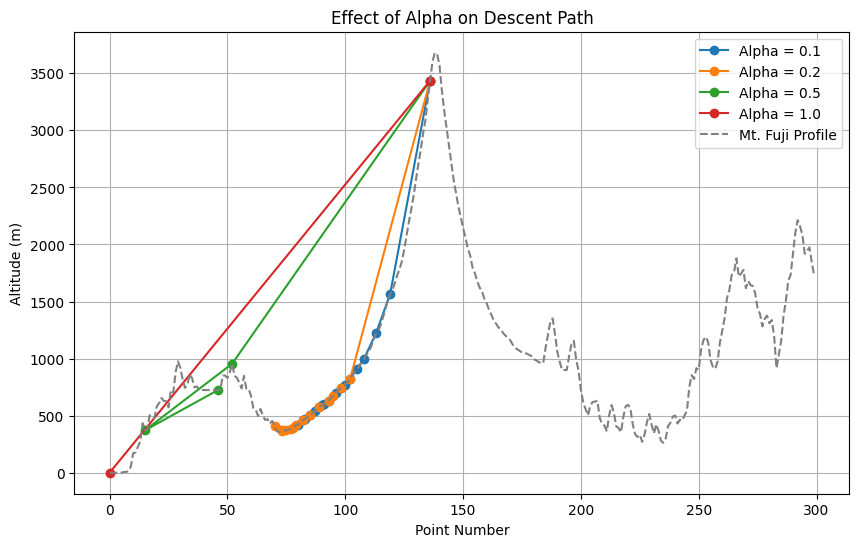

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
fuji_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)
altitudes = fuji_data[:, 3]

# Function from Problem 2
def calculate_gradient(point):
    if point == 0:
        return 0
    return (altitudes[point] - altitudes[point - 1]) / (point - (point - 1))

# Function from Problem 3
def calculate_destination(current_point, alpha):
    gradient = calculate_gradient(current_point)
    next_point = round(current_point - alpha * gradient)
    next_point = max(0, min(len(altitudes) - 1, next_point))  # Keep within range
    return next_point

# Function from Problem 4
def descend_mountain(start_point, alpha):
    path = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_destination(current_point, alpha)
        if next_point == current_point:
            break
        path.append(next_point)
        current_point = next_point

    return path

# Test different alpha values
alpha_values = [0.1, 0.2, 0.5, 1.0]
start_point = 136

plt.figure(figsize=(10, 6))

# Plot all descents for different alpha values
for alpha in alpha_values:
    path = descend_mountain(start_point, alpha)
    plt.plot(path, [altitudes[p] for p in path], marker="o", linestyle="-", label=f"Alpha = {alpha}")

# Plot the terrain of Mt. Fuji
plt.plot(range(len(altitudes)), altitudes, linestyle="dashed", color="gray", label="Mt. Fuji Profile")

plt.xlabel("Point Number")
plt.ylabel("Altitude (m)")
plt.title("Effect of Alpha on Descent Path")
plt.legend()
plt.grid()
plt.show()